# Approaching Numeric Prediction via Regression Algorithm with Pycaret

### install pycaret library

In [1]:
# pycaret setup
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.6 MB/s

### import libaries

In [2]:
# import packages
import numpy as np
import pandas as pd
import pycaret

### data load

In [3]:
# data load
data_path_url = "https://docs.google.com/spreadsheets/d/1tX6c4bvukb20rVmH3C9QRWpjHiai9E86/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true"
data_path_url_for_pandas = data_path_url.replace("/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true", "/export?format=xlsx")
df = pd.read_excel(data_path_url_for_pandas)
# display all columns
pd.set_option("display.max_columns", None)

### data - main features

In [4]:
# display first 5 rows
df.head()

,AGE,CHOL,TG,HDL,LDLd
0,25,152,189,41,81
1,78,134,101,39,83
2,94,187,85,76,100
3,60,176,94,69,86
4,82,141,114,35,94


In [5]:
# data features
df.describe(include = 'all')

,AGE,CHOL,TG,HDL,LDLd
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,57.384500,174.012000,135.071000,46.509000,107.681500
std,27.272322,47.976523,75.773536,15.467305,41.814331
min,1.000000,64.000000,35.000000,11.000000,26.000000
25%,45.000000,139.000000,86.000000,36.000000,77.000000
50%,65.000000,169.000000,116.000000,44.000000,102.000000
75%,79.000000,205.000000,160.000000,56.000000,134.000000
max,97.000000,375.000000,982.000000,147.000000,297.000000


In [6]:
# number of unique values
df.nunique()

AGE      93
CHOL    241
TG      314
HDL      91
LDLd    210
dtype: int64

In [7]:
# types of variables
df.dtypes

AGE     int64
CHOL    int64
TG      int64
HDL     int64
LDLd    int64
dtype: object

In [8]:
# number of missing values in columns
df.isnull().sum()

AGE     0
CHOL    0
TG      0
HDL     0
LDLd    0
dtype: int64

In [9]:
# percentage of missing values
df.isnull().sum()*100/len(df)

AGE     0.0
CHOL    0.0
TG      0.0
HDL     0.0
LDLd    0.0
dtype: float64

In [10]:
# display column (variable) names
df.columns

Index(['AGE', 'CHOL', 'TG', 'HDL', 'LDLd'], dtype='object')

In [12]:
# selected variables as a list
selected_variables_for_ldl = [ 'CHOL', 'TG', 'HDL', 'LDLd']

In [13]:
# display data with selected variables
df_ldl = df[selected_variables_for_ldl]
df_ldl

,CHOL,TG,HDL,LDLd
0,152,189,41,81
1,134,101,39,83
2,187,85,76,100
3,176,94,69,86
4,141,114,35,94
...,...,...,...,...
1995,250,80,60,182
1996,283,76,84,183
1997,153,101,54,88
1998,315,145,58,236


## Exploratory Data Analysis

In [14]:
pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20

In [15]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
target_variable = 'LDLd'
dft = AV.AutoViz(filename='',dfte=df_ldl, depVar=target_variable)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Data preprocessign with pycaret
from pycaret.regression import *

data = df_ldl

s = setup(data, target = 'LDLd', session_id = 123,
          remove_multicollinearity = True, normalize = True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,LDLd
2,Target type,Regression
3,Original data shape,"(2000, 4)"
4,Transformed data shape,"(2000, 4)"
5,Transformed train set shape,"(1600, 4)"
6,Transformed test set shape,"(400, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [17]:
# compare different ML models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,6.0200,61.9855,7.8401,0.9645,0.0904,0.0648,0.6730
ridge,Ridge Regression,6.0205,61.9856,7.8402,0.9645,0.0903,0.0648,0.0510
lar,Least Angle Regression,6.0200,61.9855,7.8401,0.9645,0.0904,0.0648,0.0530
br,Bayesian Ridge,6.0201,61.9854,7.8401,0.9645,0.0904,0.0648,0.0300
huber,Huber Regressor,5.9959,62.2271,7.8557,0.9644,0.0907,0.0643,0.0370
lasso,Lasso Regression,6.4698,70.9650,8.3976,0.9593,0.0930,0.0698,0.0620
llar,Lasso Least Angle Regression,6.4692,70.9528,8.3969,0.9593,0.0930,0.0698,0.0460
gbr,Gradient Boosting Regressor,6.5291,74.6057,8.6144,0.9575,0.0951,0.0706,0.2740
par,Passive Aggressive Regressor,6.9072,81.5101,8.9716,0.9533,0.1051,0.0747,0.0310
lightgbm,Light Gradient Boosting Machine,6.7590,83.5476,9.0914,0.9527,0.0982,0.0724,0.4690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [18]:
# create individually 2 best models
br = create_model('br')
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.7852,59.2333,7.6963,0.9631,0.0771,0.0585
1,5.9829,58.1197,7.6236,0.9713,0.0816,0.0612
2,6.6564,76.9198,8.7704,0.9630,0.0987,0.0722
3,6.7291,79.2156,8.9003,0.9571,0.1085,0.0711
4,5.6237,52.4194,7.2401,0.9690,0.0775,0.0613
5,5.5440,49.9636,7.0685,0.9717,0.0797,0.0590
6,5.8713,54.4485,7.3789,0.9660,0.0876,0.0675
7,5.5839,52.5485,7.2490,0.9673,0.0890,0.0633
8,6.5537,81.7640,9.0423,0.9414,0.1033,0.0695


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.7708,60.6873,7.7902,0.9622,0.0782,0.0583
1,6.0113,58.6289,7.6570,0.9711,0.0814,0.0611
2,6.6621,78.2591,8.8464,0.9624,0.0992,0.0721
3,6.7118,79.3677,8.9089,0.9570,0.1093,0.0709
4,5.5271,51.4188,7.1707,0.9696,0.0770,0.0603
5,5.5905,50.8974,7.1342,0.9712,0.0806,0.0592
6,5.8444,54.9483,7.4127,0.9657,0.0872,0.0667
7,5.5562,52.5877,7.2517,0.9673,0.0901,0.0628
8,6.4791,80.6534,8.9807,0.9422,0.1033,0.0685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

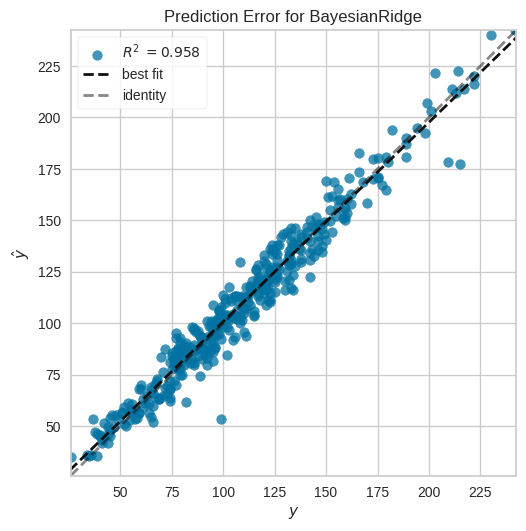

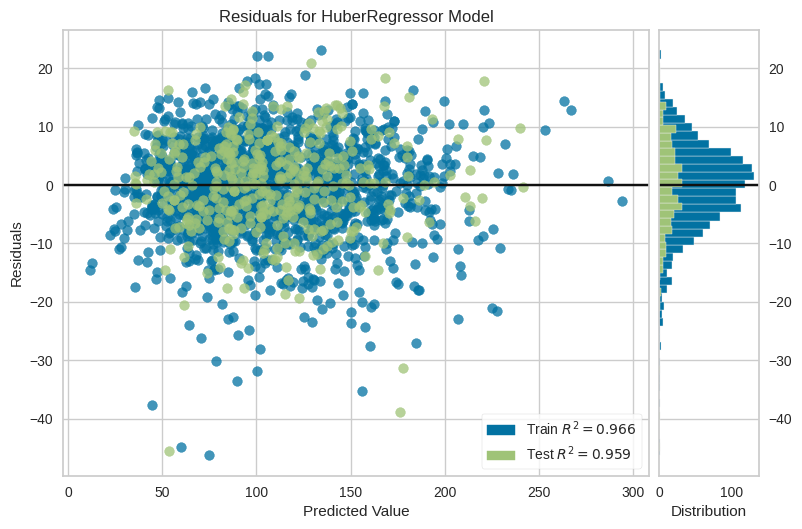

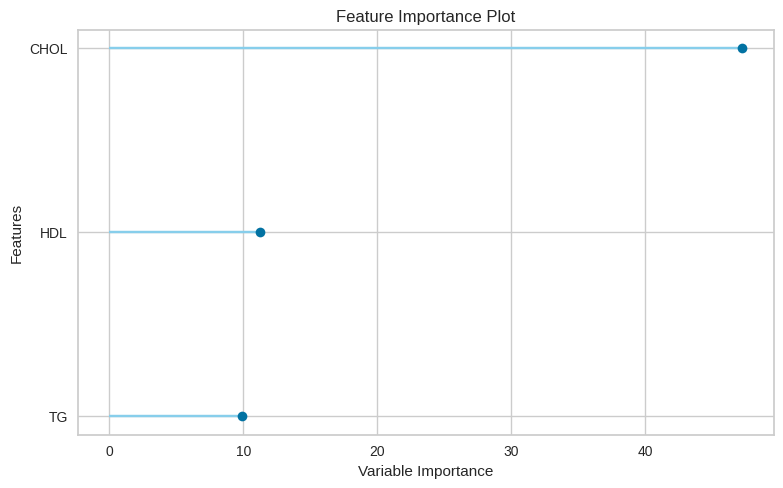

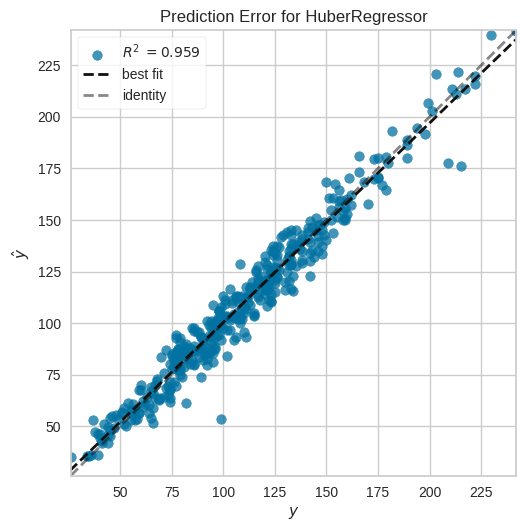

In [19]:
plot_model(br, plot = 'error')
plot_model(huber, plot = 'residuals')
plot_model(br, plot = 'feature')
plot_model(huber, plot = 'error')


In [20]:
predict_model(br)
print('\n')
print('---------------------------------------------------------')
print('\n')
predict_model(huber)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,6.1853,65.0921,8.0680,0.9582,0.0850,0.0638




---------------------------------------------------------




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,6.1506,64.6298,8.0393,0.9585,0.0848,0.0633


,CHOL,TG,HDL,LDLd,prediction_label
1342,165,131,43,99,101.677616
1338,197,89,51,132,132.611635
189,109,118,30,57,58.406831
1332,149,94,60,76,78.405494
1816,138,198,46,71,64.105293
...,...,...,...,...,...
1591,236,202,39,179,164.426736
605,274,307,49,189,180.009664
319,112,101,30,74,63.616219
320,200,132,53,121,128.286131


In [21]:
evaluate_model(huber)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# END